# Categorical and numerical variables upscaling using SMOTENC

In [33]:
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

In [6]:
dataset = pd.read_csv('../raw_data/enriched_CT_PM.csv')

In [7]:
dataset.shape

(1222, 35)

In [8]:
dataset.columns

Index(['Unnamed: 0', 'Medicine name', 'Therapeutic area', 'INN',
       'Authorisation status', 'Generic', 'Biosimilar', 'Orphan medicine',
       'First published', 'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results', 'pm_titles',
       'pm_abstracts'],
      dtype='object')

## Get numerical and categorical variables only

In [9]:
X_num_dataset = dataset[[ 'Generic', 'Biosimilar', 'Orphan medicine',
       'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results']]

## Convert to float and keep 3 categorical columns as int

In [24]:
X_num_dataset = X_num_dataset.astype('float64')
X_num_dataset = X_num_dataset.astype({'Generic': 'int32', 'Biosimilar': 'int32', 'Orphan medicine': 'int32'})
X_num_dataset.dtypes

Generic                             int32
Biosimilar                          int32
Orphan medicine                     int32
n_trials                          float64
status_not_yet_recruiting         float64
status_recruiting                 float64
status_enrolling_by_invitation    float64
status_active_not_recruiting      float64
status_suspended                  float64
status_terminated                 float64
status_completed                  float64
status_withdrawn                  float64
status_unknown                    float64
org_fed                           float64
org_indiv                         float64
org_industry                      float64
org_network                       float64
org_nih                           float64
org_other                         float64
org_other_gov                     float64
phase_early_1                     float64
phase_not_applicable              float64
phase_1                           float64
phase_2                           

## Confirm that the refused authorization samples is under represented

In [10]:
y_num_dataset = dataset['Authorisation status'].astype(int)

<AxesSubplot:>

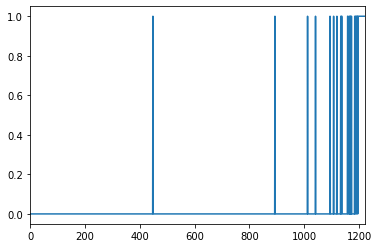

In [11]:
y_num_dataset.plot()

In [12]:
print('Original dataset shape (%s, %s)' % X_num_dataset.shape)

Original dataset shape (1222, 27)


In [13]:
print('Original dataset samples per class {}'.format(Counter(y_num_dataset)))

Original dataset samples per class Counter({0: 1173, 1: 49})


## Procede with the upsampling using SMOTENC

In [25]:
sm = SMOTENC(random_state=42, categorical_features=[0, 1, 2])

In [26]:
X_res, y_res = sm.fit_resample(X_num_dataset, y_num_dataset)

c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


In [27]:
print('Resampled dataset samples per class {}'.format(Counter(y_res)))

Resampled dataset samples per class Counter({0: 1173, 1: 1173})


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca_before = PCA(n_components = 2)

In [30]:
x2d_before = pca_before.fit_transform(X_num_dataset.astype('float64'))

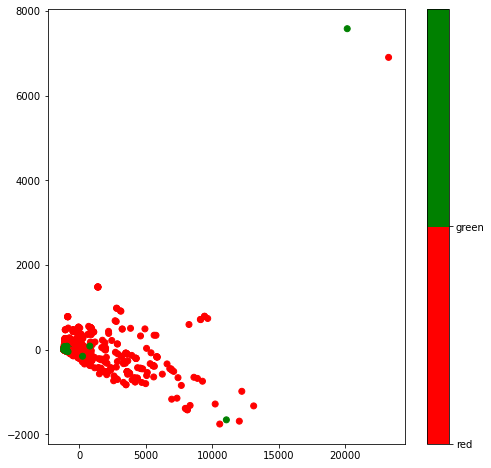

In [35]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(x2d_before.T[0], x2d_before.T[1], c=y_num_dataset, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_num_dataset),max(y_num_dataset)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.show()

In [36]:
pca = PCA(n_components = 2)

In [39]:
X2D = pca.fit_transform(X_res.astype('float64'))

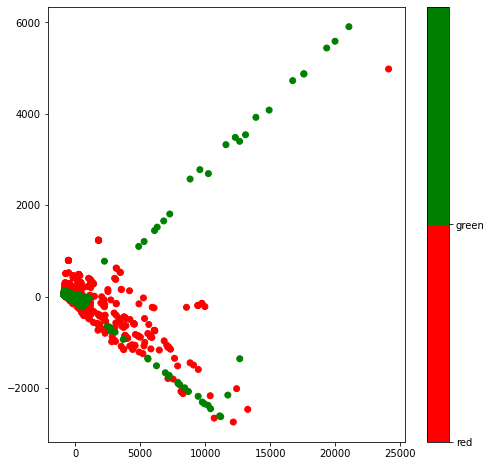

In [40]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=y_res, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_res),max(y_res)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

<AxesSubplot:>

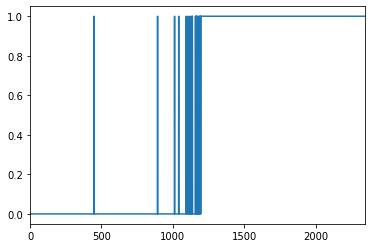

In [120]:
y_res.plot()

## Removing outliers

In [43]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

In [44]:
X_num_dataset.apply(minMax)

,Generic,Biosimilar,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
min,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1,1,1,8167.0,277.0,946.0,45.0,324.0,45.0,374.0,...,239.0,5364.0,211.0,83.0,3025.0,817.0,1310.0,1077.0,1020.0,22446.0


In [45]:
# see what rows are probably those 2 outliers in the top
dataset[dataset['pm_results']>=15000]

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,...,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
270,270,Insuman,Diabetes Mellitus,insulin human,0,0,0,0,2018-04-03 02:00:00,8167,...,211,83,3025,817,1146,1077,1020,22446,Comparison of insulin aspart vs. regular human...,"In type 2 diabetes mellitus, treatment with in..."
1188,1188,Solumarv,Diabetes Mellitus,insulin human,1,0,1,0,2016-02-11 13:01:00,8167,...,211,83,3025,817,1146,1077,1020,19257,Comparison of insulin aspart vs. regular human...,"In type 2 diabetes mellitus, treatment with in..."


In [46]:
no_out_dataset = dataset.drop(index=[270, 1188])

In [47]:
X_num_dataset = no_out_dataset[[ 'Generic', 'Biosimilar', 'Orphan medicine',
       'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results']]

In [48]:
X_num_dataset = X_num_dataset.astype('float64')
X_num_dataset = X_num_dataset.astype({'Generic': 'int32', 'Biosimilar': 'int32', 'Orphan medicine': 'int32'})

In [49]:
y_num_dataset = no_out_dataset['Authorisation status'].astype(int)

In [50]:
smtenc = SMOTENC(random_state=42, categorical_features=[0, 1, 2])

In [51]:
X_res, y_res = sm.fit_resample(X_num_dataset, y_num_dataset)

c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
c:\users\pedro\.venvs\lewagon\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


In [52]:
pca_before = PCA(n_components = 2)

In [53]:
x2d_before = pca_before.fit_transform(X_num_dataset.astype('float64'))

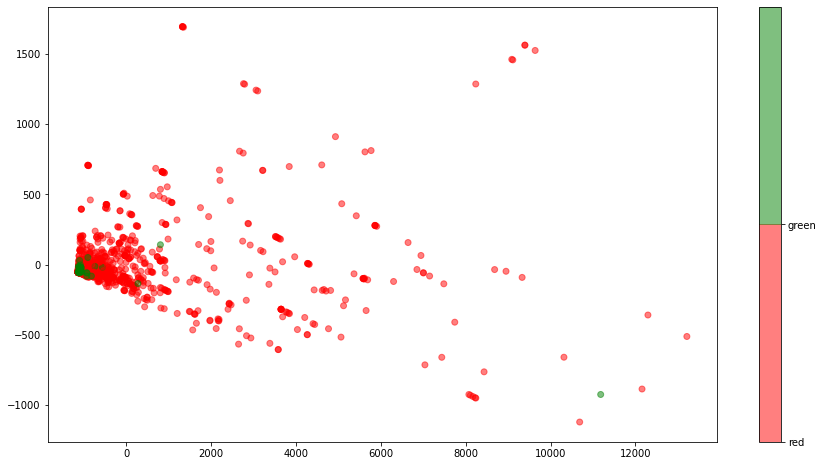

In [63]:
# No upsampling
colors = ['red','green']

fig = plt.figure(figsize=(15,8))
plt.scatter(x2d_before.T[0], x2d_before.T[1], c=y_num_dataset, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
cb = plt.colorbar()
loc = np.arange(0,max(y_num_dataset),max(y_num_dataset)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.show()

In [64]:
pca_before = PCA(n_components = 2)

In [66]:
x2d_before = pca_before.fit_transform(X_res.astype('float64'))

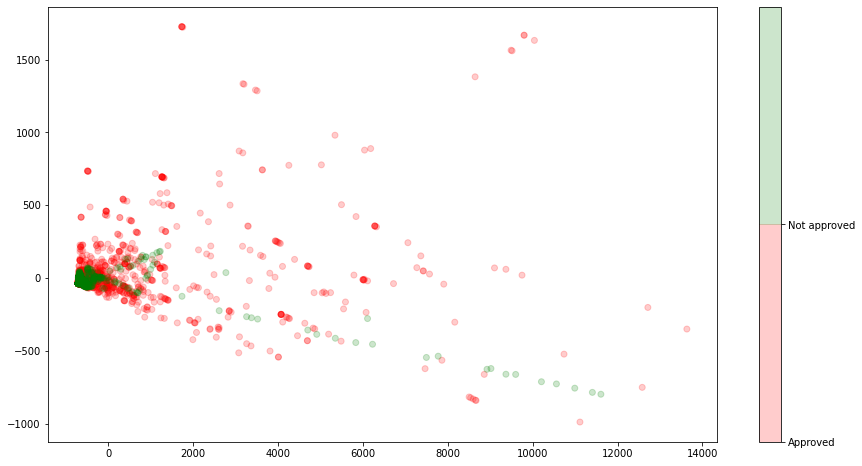

In [77]:
# With upsampling
colors = ['red','green']

fig = plt.figure(figsize=(15,8))
plt.scatter(x2d_before.T[0], x2d_before.T[1], c=y_res, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.2)
cb = plt.colorbar()
loc = np.arange(0,max(y_num_dataset),max(y_num_dataset)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(['Approved', 'Not approved'])
plt.show()

In [76]:
X_res[y_res == 1].head()

,Generic,Biosimilar,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
447,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0
892,0,0,0,29.0,0.0,13.0,0.0,4.0,0.0,0.0,...,0.0,12.0,0.0,0.0,0.0,18.0,16.0,2.0,0.0,143.0
1011,0,0,0,720.0,23.0,105.0,1.0,69.0,4.0,79.0,...,60.0,418.0,10.0,6.0,35.0,144.0,393.0,161.0,15.0,12299.0
1040,0,0,0,85.0,2.0,17.0,1.0,15.0,0.0,11.0,...,0.0,60.0,0.0,0.0,1.0,14.0,48.0,14.0,6.0,562.0
1093,0,0,0,11.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,2.0,5.0,3.0,54.0
